In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_7b0e69f61622477eb7f84abe6b51f51c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='24FkzYXqrXMRKI8S1IGAfj9SxvgroVGPqIw1K5nbVl3Y',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_7b0e69f61622477eb7f84abe6b51f51c.get_object(Bucket='exeml-donotdelete-pr-fdwb2w29fdszrb',Key='Avalanche.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()



,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,H,52,-17,19,2
1,24,L,23,-8,19,0
2,15,H,30,7,19,0
3,27,L,61,-13,25,1
4,34,H,4,-20,7,0


In [3]:
data.isnull().any()

Slope              False
Forest Density     False
Snow Density       False
Air Temperature    False
Wind               False
Prediction         False
dtype: bool

In [4]:
x=data.iloc[:,0:5].values
y=data.iloc[:,5:6].values
x[0]

array([59, 'H', 52, -17, 19], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [6]:
le=LabelEncoder()

In [7]:
x[:,1]=le.fit_transform(x[:,1])
x[0]

array([59, 0, 52, -17, 19], dtype=object)

In [8]:
oh=OneHotEncoder(categorical_features=[1])

In [9]:
x=oh.fit_transform(x).toarray()

In [10]:
x=x[:,1:]

In [11]:
#import keras
#y=keras.utils.to_categorical(y)

In [12]:
data1=pd.DataFrame(x,columns=['FD0','FD1','Slope','Snow Density','Temperature','Wind'])

In [13]:
data2=pd.DataFrame(y,columns=['p'])

In [14]:
data1['p']=data2['p']

In [15]:
import seaborn as sns

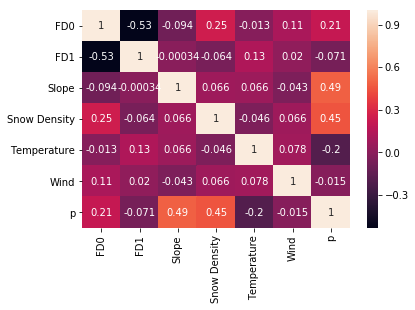

In [16]:
sns.heatmap(data1.corr(),annot=True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
pred=dt.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,pred)


0.82926829268292679

In [23]:
x_test[0:10]

array([[  1.,   0.,  48.,  55.,  15.,  19.],
       [  0.,   0.,  26.,  12.,  -8.,  17.],
       [  1.,   0.,  61.,  17., -11.,   9.],
       [  1.,   0.,  80.,  73.,  14.,  35.],
       [  0.,   1.,  34.,  33.,  13.,  35.],
       [  0.,   0.,  50.,   5., -31.,   7.],
       [  1.,   0.,  34.,  76.,  -7.,  40.],
       [  1.,   0.,  27.,  61., -13.,  25.],
       [  0.,   1.,  34.,  59., -29.,   8.],
       [  1.,   0.,  59.,   6.,  10.,  37.]])

In [24]:
y=dt.predict([[0,0,0,0,0,0]])

In [25]:
y

array([0])

In [26]:
#import pickle
#pickle.dump( pp, open( "mymodel.pkl", 'wb') )

In [27]:
#!mkdir model-dir

In [28]:
#!cp mymodel.pkl model-dir

In [29]:
#!tar -zcvf mymodel.tar.gz mymodel.pkl

In [30]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-06-28 09:20:29,243 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2019-06-28 09:20:32,498 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"ca097249a5d929e6ea2eb6361a798fca","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


In [31]:
wml_credentials={"url":"https://eu-gb.ml.cloud.ibm.com",
                "access_key":"e87XizXGAoSZqxtUr0kEb6C7NyiFAeKO7fo8EYB5rM27",
                "username":"fa25c3ed-5803-43d1-9e75-6a85fa7d7df9",
                "password":"0472fff3-d979-483b-9083-4998f9f53f72",
                "instance_id":"e82bbe41-6721-4c06-9ac6-894baee0ade8"
                }

In [32]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [33]:
#metadata = {
#    client.repository.ModelMetaNames.NAME: "My scikit-learn model (.pkl)",
#    client.repository.ModelMetaNames.FRAMEWORK_NAME: "scikit-learn",
#    client.repository.ModelMetaNames.FRAMEWORK_VERSION: "0.19.1"
#}


In [34]:
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"Arun",
            client.repository.ModelMetaNames.AUTHOR_EMAIL:"arun@gmail.com",
            client.repository.ModelMetaNames.NAME:"Profit Prediction"}

In [35]:
#model_s=client.repository.store_model(model="model-dir",meta_props=metadata)
model_s=client.repository.store_model(dt,meta_props=model_props)

In [36]:
client.repository.list()

------------------------------------  ----------------------------  ------------------------  -----------------  -----------------
GUID                                  NAME                          CREATED                   FRAMEWORK          TYPE
1930dc04-1fee-4ce7-9e06-b0d7415db1f3  Profit Prediction             2019-06-28T09:20:29.423Z  scikit-learn-0.19  model
8f688347-6b3f-4dbc-a3e5-53b63ae51fbb  Profit Prediction             2019-06-28T09:16:58.622Z  scikit-learn-0.19  model
1d9db598-3ad5-48ff-bfd4-02d288c0f658  My scikit-learn model (.pkl)  2019-06-28T07:33:19.486Z  scikit-learn-0.19  model
70d3685f-e47b-4fc2-b35e-27ea445a3081  Avalanche Prediction          2019-06-28T07:18:35.214Z  scikit-learn-0.19  model
6f2bf3d6-a748-4839-adce-01760e3cebe3  Avalanche Prediction          2019-06-28T06:24:53.900Z  scikit-learn-0.19  model
54c747f9-6b06-4712-9318-8dafb87b88fb  Avalanche Prediction          2019-06-28T06:16:20.508Z  scikit-learn-0.19  model
0abc5546-d29b-4cf5-af34-d6234fb6abd4 

In [37]:
published_model_uid=client.repository.get_model_uid(model_s)

In [38]:
published_model_uid

'1930dc04-1fee-4ce7-9e06-b0d7415db1f3'

In [42]:
d=client.deployments.create(published_model_uid,name="machine")



#######################################################################################

Synchronous deployment creation for uid: '1930dc04-1fee-4ce7-9e06-b0d7415db1f3' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a89e7335-3a91-43b8-9504-83a21b98b660'
------------------------------------------------------------------------------------------------




In [43]:
scoring_endpoint=client.deployments.get_scoring_url(d)

In [44]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e82bbe41-6721-4c06-9ac6-894baee0ade8/deployments/a89e7335-3a91-43b8-9504-83a21b98b660/online'

In [45]:
data=[0,1,15,10,8,14]

In [46]:
#import numpy as np
#d1=np.array(data)

In [47]:
scoring_payload = {"fields":["FD0","FD1","Slope","Snow Density","Temperature","Wind"],"values":[data]}
predictions = client.deployments.score(scoring_endpoint, scoring_payload)
print(predictions)

{'values': [[0, [1.0, 0.0, 0.0]]], 'fields': ['prediction', 'probability']}


In [48]:
client.deployments.list()

------------------------------------  -------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME     TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
a89e7335-3a91-43b8-9504-83a21b98b660  machine  online  DEPLOY_SUCCESS  2019-06-28T09:21:44.059Z  scikit-learn-0.19  model
bfb72a7e-9d20-44ed-bdae-49168e41a2ac  machine  online  DEPLOY_SUCCESS  2019-06-28T09:18:47.500Z  scikit-learn-0.19  model
16a8054e-acc6-4519-a0d7-5e848940c9eb  machine  online  DEPLOY_SUCCESS  2019-06-28T07:33:45.515Z  scikit-learn-0.19  model
d3bef6dc-70c5-4797-872e-4612784f513d  machine  online  DEPLOY_SUCCESS  2019-06-28T06:16:23.998Z  scikit-learn-0.19  model
f7504dde-6de1-4118-8524-eb1b4d4cc24f  machine  online  DEPLOY_SUCCESS  2019-06-28T06:09:51.750Z  scikit-learn-0.19  model
------------------------------------  -------  ------  --------------  ------------------------  -----------------  -------------
